In [73]:
import os, sys, tarfile

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread


# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
#from random import randint
#import pickle





In [74]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2023-12-01 02:51:48--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  21.0MB/s    in 11s     

2023-12-01 02:51:59 (19.4 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [75]:
def extractzipfolder():
  tar = tarfile.open("/content/flower_photos.tgz")
  tar.extractall()
  tar.close()

In [76]:
def unique_filename(file):
    duplicate_nr = 0
    base, extension = os.path.splitext(file)
    while os.path.exists(file):
        duplicate_nr += 1
        file = f'{base}({duplicate_nr}){extension}'
    return file

In [77]:
existsFile = []
flowers_list = []
def move_file(source, destination):
  files = os.listdir(source)
  for file in files:
    isMove=False
    fileName = file
    if(file.endswith(".jpg")):
      basefolder = os.path.basename(os.path.normpath(source))
      if(os.path.exists(os.path.join(destination,file))):
        actualsource_file_path = os.path.join(source, file)
        dir_file_path = unique_filename(actualsource_file_path)
        fileName = dir_file_path
        os.rename(os.path.join(destination,file), dir_file_path)
        shutil.move(dir_file_path, destination)
        os.unlink(actualsource_file_path)
        isMove = True
      else:
          shutil.move(os.path.join(source,file), destination)
          isMove= True
    else:
      if(file.endswith(".txt") == False):
        move_file(os.path.join(rootsource,file), destination)
      #file_name = os.path.join(source, file)
    if(isMove):
      flowers_list.append(
        {
            'Category': basefolder,
            'file_name': fileName
        }
      )
  return flowers_list

In [78]:
def delete_empty_folder(folder_path):
  for entry in os.scandir(folder_path):
    if os.path.isdir(entry.path) and not os.listdir(entry.path):
      shutil.rmtree(entry.path)

In [79]:
import shutil
import os

extractzipfolder()
# Define the source and destination path
rootsource = "/content/flower_photos"
destination = "/content/flower_photos"
list_flower = move_file(rootsource,destination)
delete_empty_folder("/content/flower_photos");


Error: ignored

In [80]:
path = r"/content/flower_photos"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
flowers = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
          if(len(flowers) < 501):
            flowers.append(file.name)
          else:
            break

In [81]:
# view the first 5 flower entries
print(flowers)

['8757650550_113d7af3bd.jpg', '8719032054_9a3ce4f0ff.jpg', '13903946578_187f904c9a_n.jpg', '2256214682_130c01d9d9.jpg', '8929288228_6795bcb1fe.jpg', '5626895440_97a0ec04c2_n.jpg', '16291797949_a1b1b7c2bd_n.jpg', '7924174040_444d5bbb8a.jpg', '17908793211_ff0f1f81d3_n.jpg', '4562516418_8ccb8c103f.jpg', '9491955955_d0b2c83834.jpg', '130684927_a05164ba13_m.jpg', '15030133005_9728102622_z.jpg', '10617191174_9a01753241_n.jpg', '7062171343_db61c92737_n.jpg', '14523675369_97c31d0b5b.jpg', '16316557109_7fc55c1cbc_m.jpg', '15238348741_c2fb12ecf2_m.jpg', '19961979110_fcd8092388_m.jpg', '4724713781_d169f98a35.jpg', '5635348214_a4e2b19ffe.jpg', '8632704230_ccafc5f7e2.jpg', '8691437509_9ac8441db7_n.jpg', '4624404489_11e10fcd33_n.jpg', '2634665077_597910235f_m.jpg', '8265023280_713f2c69d0_m.jpg', '2535727910_769c020c0d_n.jpg', '6606743797_c90c669757.jpg', '12701063955_4840594ea6_n.jpg', '20905163782_312e2c3bda_n.jpg', '15681454551_b6f73ce443_n.jpg', '8382667241_0f046cecdb_n.jpg', '2780702427_312333ef

In [82]:
def load_images(path):
    flower_pixel = imread("/content/flower_photos/"+path)
    return flower_pixel

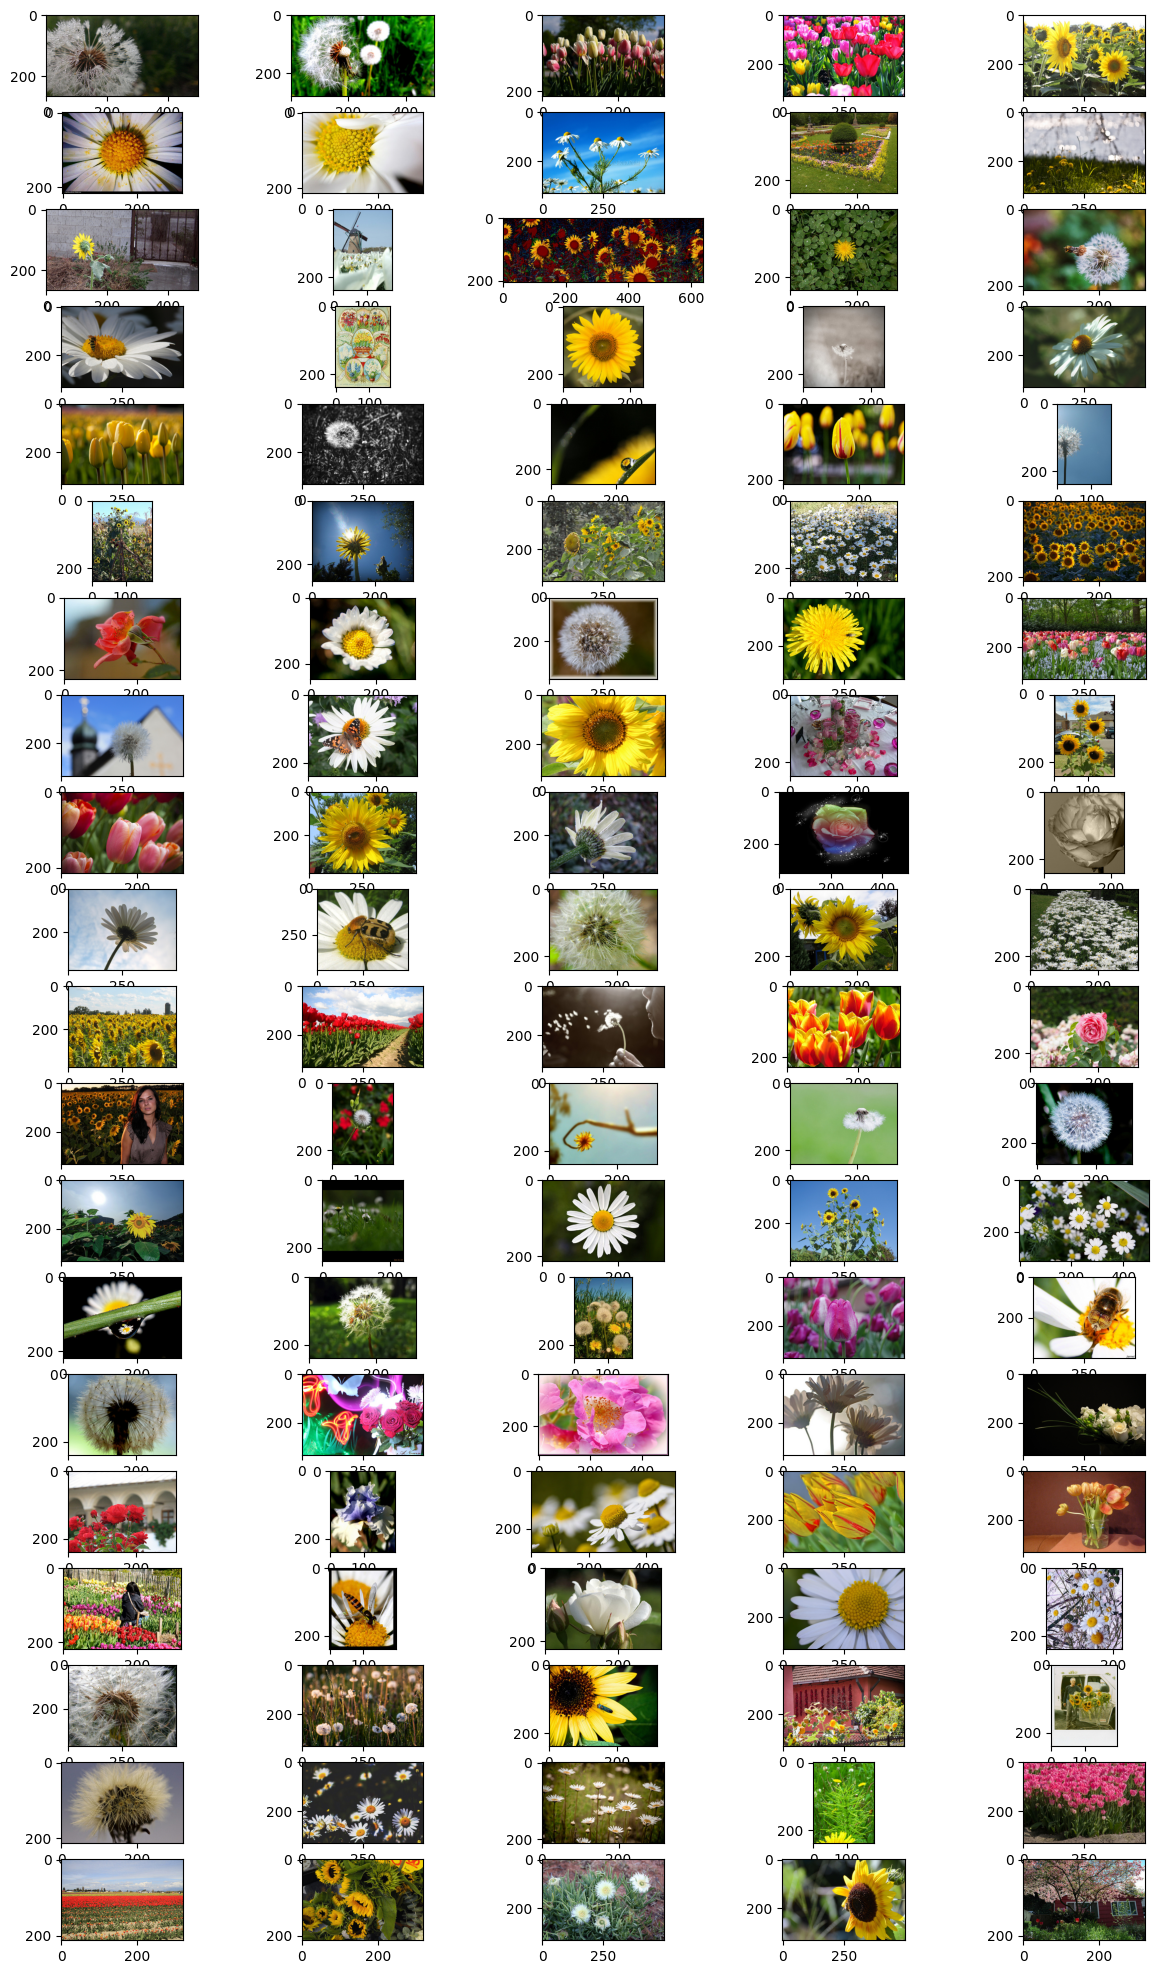

In [83]:
plt.figure(figsize = (15, 25))
actual_image_shapes = []
for i in range(len(flowers[0:100])):
  pixels = load_images(flowers[i])
  #reshaped_pixels = pixels.reshape(pixels.shape[0] * pixels.shape[1], pixels.shape[2])
  plt.subplot(20, 5, i + 1)
  plt.imshow(pixels);
  #actual_image_shapes.append({"name" : flowers[i], "shape" : pixels.shape, "reshape:" : reshaped_pixels.shape})
  actual_image_shapes.append({"name" : flowers[i], "shape" : pixels.shape})
plt.show()
df_image_shapes = pd.DataFrame(actual_image_shapes)

# 1st Clustering Attemp
I belive is not a bad attemp is almost doing the job

In [ ]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

In [ ]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
data = {}
p = r"flower_features.pkl"

# lop through each image in the dataset
for flower in flowers:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(flower,model)
        data[flower] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)




1/1 [==============================] - 0s 24ms/step


In [ ]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

# get the unique labels (from the flower_labels.csv)
unique_labels = [0,1,2]

In [ ]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")

Components before PCA: 4096
Components after PCA: 100


In [ ]:
# cluster feature vectors
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=22)

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0,
       0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1,
       1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2,
       2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 2, 2,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2,
       2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1, 2,
       0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1,

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
# function that lets you view a cluster (based on identifier)
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

In [ ]:
# this is just incase you want to see which value for k might be the best
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)

    sse.append(km.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

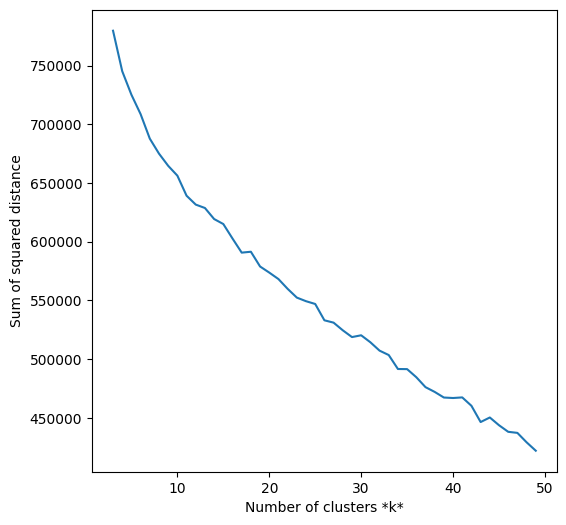

In [ ]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Cluster: 0


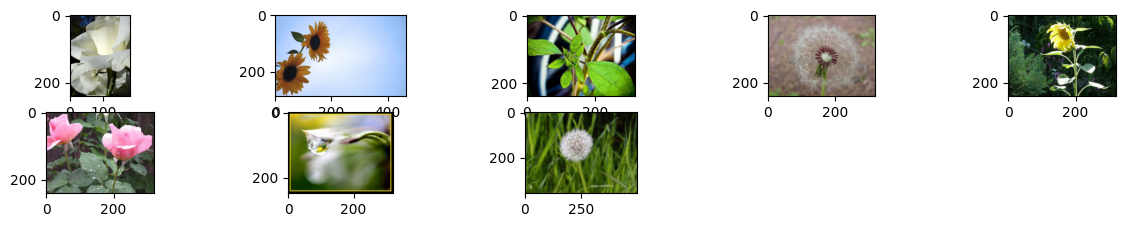

Cluster: 1


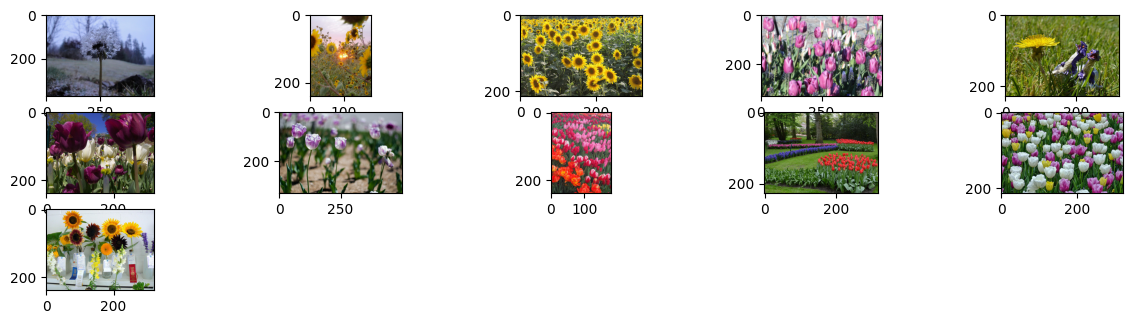

Cluster: 2


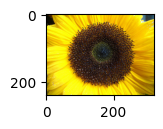

In [ ]:

actual_image_shapes = []
for i in range(len(groups)):
  print("Cluster:", i)
  plt.figure(figsize = (15, 25))
  for j in range(len(groups[i])):
    pixels = load_images(groups[i][j])
    plt.subplot(20, 5, j + 1)
    plt.imshow(pixels);
  plt.show()

Clipping cluster size from 274 to 30


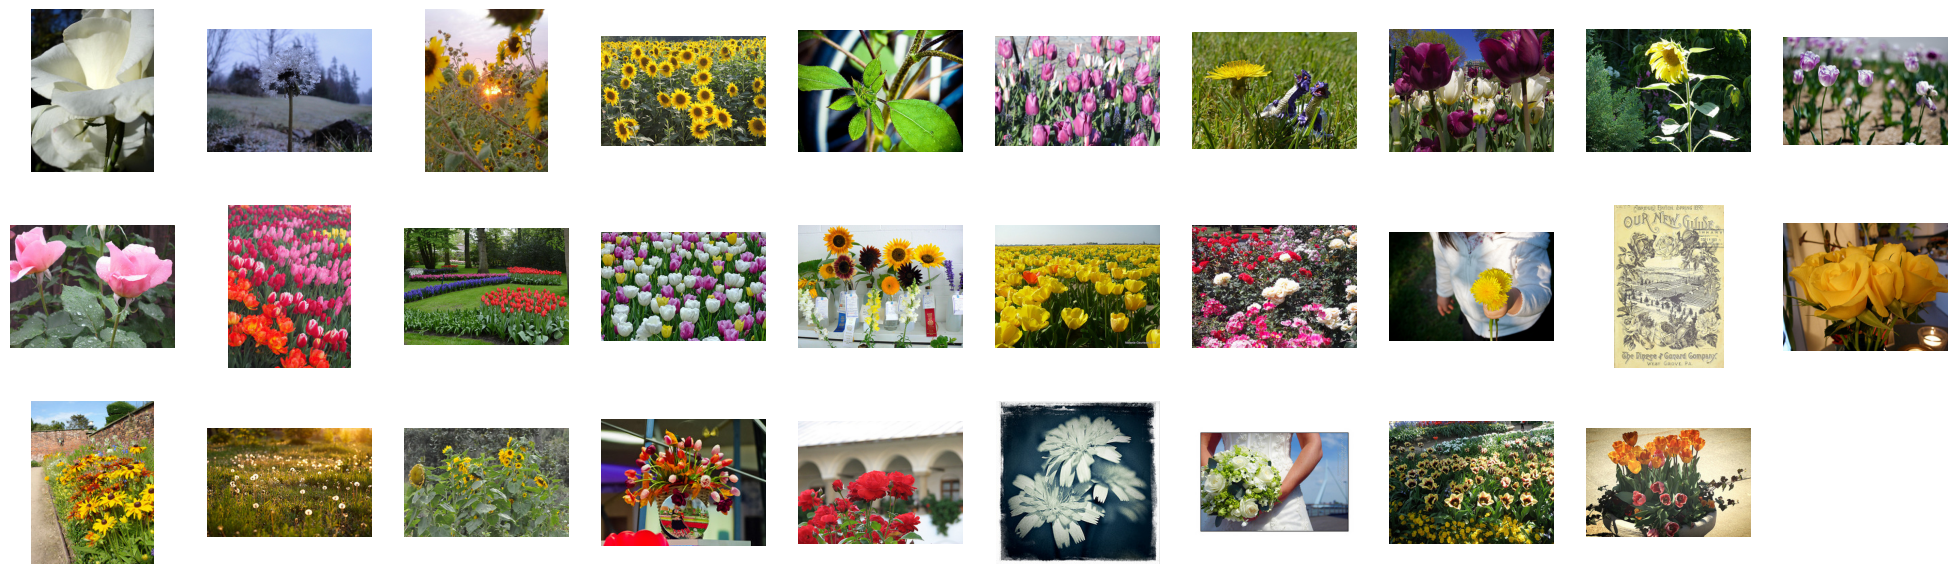

In [ ]:
view_cluster(2)

# 2nd Clustering Attemp

VGG16
We'll now load up the keras models with the imagenet weights. We'll remove the top dense layers, since we won't need to classify things here, and we just want these encoded features from the images.

In [84]:
# Load the models with ImageNet weights
import keras

vgg16_model = keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

Output... falls flat <br>
The covnet models will give us 3D vectors that represent the image. We need to flatten these for the clustering algorithms to start working with them.

In [85]:
def covnet_transform(covnet_model, raw_images):

    # Pass our training data through the network
    pred = covnet_model.predict(raw_images)

    # Flatten the array
    flat = pred.reshape(raw_images.shape[0], -1)

    return flat

In [86]:
import cv2
def load_images(DIR):

    # Define empty arrays where we will store our images and labels
    images = []

    for file in flowers:
        # build file path
        file_path = os.path.join(DIR, file)

        # Read the image
        image = cv2.imread(file_path)

        # Resize it to 224 x 224
        image = cv2.resize(image, (224,224))

        # Convert it from BGR to RGB so we can plot them later (because openCV reads images as BGR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Now we add it to our array
        images.append(image)

    return images

In [87]:
images = load_images(path)

In [88]:
def normalise_images(images):

    # Convert to numpy arrays
    images = np.array(images, dtype=np.float32)

    # Normalise the images
    images /= 255

    return images

In [89]:
images = normalise_images(images)

In [90]:
vgg16_output = covnet_transform(vgg16_model, images)
print("VGG16 flattened output has {} features".format(vgg16_output.shape[1]))

16/16 [==============================] - 2s 124ms/step
VGG16 flattened output has 25088 features


PCA <br>
While k-means clustering has coped with these numbers, Gaussian Mixture Modelling has not and the computer consistently ran out of memory and struggled to produce results.

We therefore look to PCA for dimensionality reduction, so that our clustering algorithms can cope.

In [91]:
# Function that creates a PCA instance, fits it to the data and returns the instance
def create_fit_PCA(data, n_components=None):

    p = PCA(n_components=n_components, random_state=728)
    p.fit(data)

    return p

In [92]:
# Create PCA instances for each covnet output
vgg16_pca = create_fit_PCA(vgg16_output)


In [93]:
# Function to plot the cumulative explained variance of PCA components
# This will help us decide how many components we should reduce our features to
def pca_cumsum_plot(pca):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

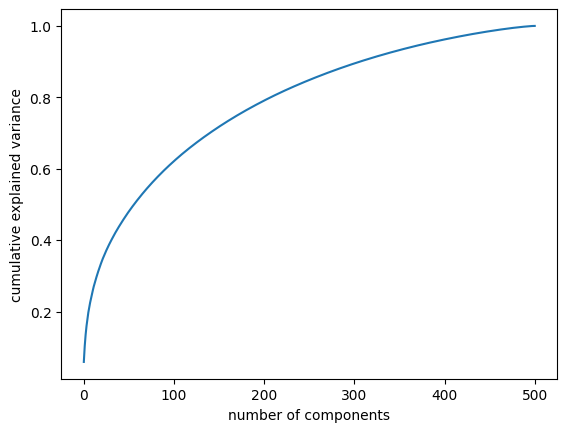

In [94]:
# Plot the cumulative explained variance for each covnet
pca_cumsum_plot(vgg16_pca)

In [95]:
# PCA transformations of covnet outputs
vgg16_output_pca = vgg16_pca.transform(vgg16_output)

Cluster time <br>
Let's write a couple of functions that would create and fit KMeans. While it can make sense to combine them in one function that returns both, I've seperated them so we can execute them seperately and make some observations without overloading the PC

In [104]:
def create_train_kmeans(data, number_of_clusters=4):

  k = KMeans(n_clusters=number_of_clusters, random_state=728)

  # Train it up
  k.fit(data)

  return k

In [120]:
# Pass the data into the algorithm and predict who lies in which cluster.
# Since we're using the same data that we trained it on, this should give us the training results.

# Here we create and fit a KMeans model with the PCA outputs
print("KMeans (PCA): \n")

print("VGG16")
K_vgg16_pca = create_train_kmeans(vgg16_output_pca)

KMeans (PCA): 

VGG16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [121]:
# Now we get the custer model predictions

# KMeans with PCA outputs
k_vgg16_pred_pca = K_vgg16_pca.predict(vgg16_output_pca)


In [107]:
def plotClusters(clusters_pca):
  import matplotlib.pyplot as plt
  import numpy as np

  num_images = 5

  # Get unique clusters
  clusters_vgg = np.unique(clusters_pca)

  fig, axs = plt.subplots(len(clusters_vgg), num_images, figsize=(15, 15))

  for i, cluster in enumerate(clusters_vgg):
      # Get indices of images in this cluster
      indices = np.where(clusters_pca == cluster)[0]

      # Choose random images from this cluster
      random_indices = np.random.choice(indices, num_images)

      for j, image_index in enumerate(random_indices):
          axs[i, j].imshow(images[image_index])
          axs[i, j].axis('off')

  plt.show()

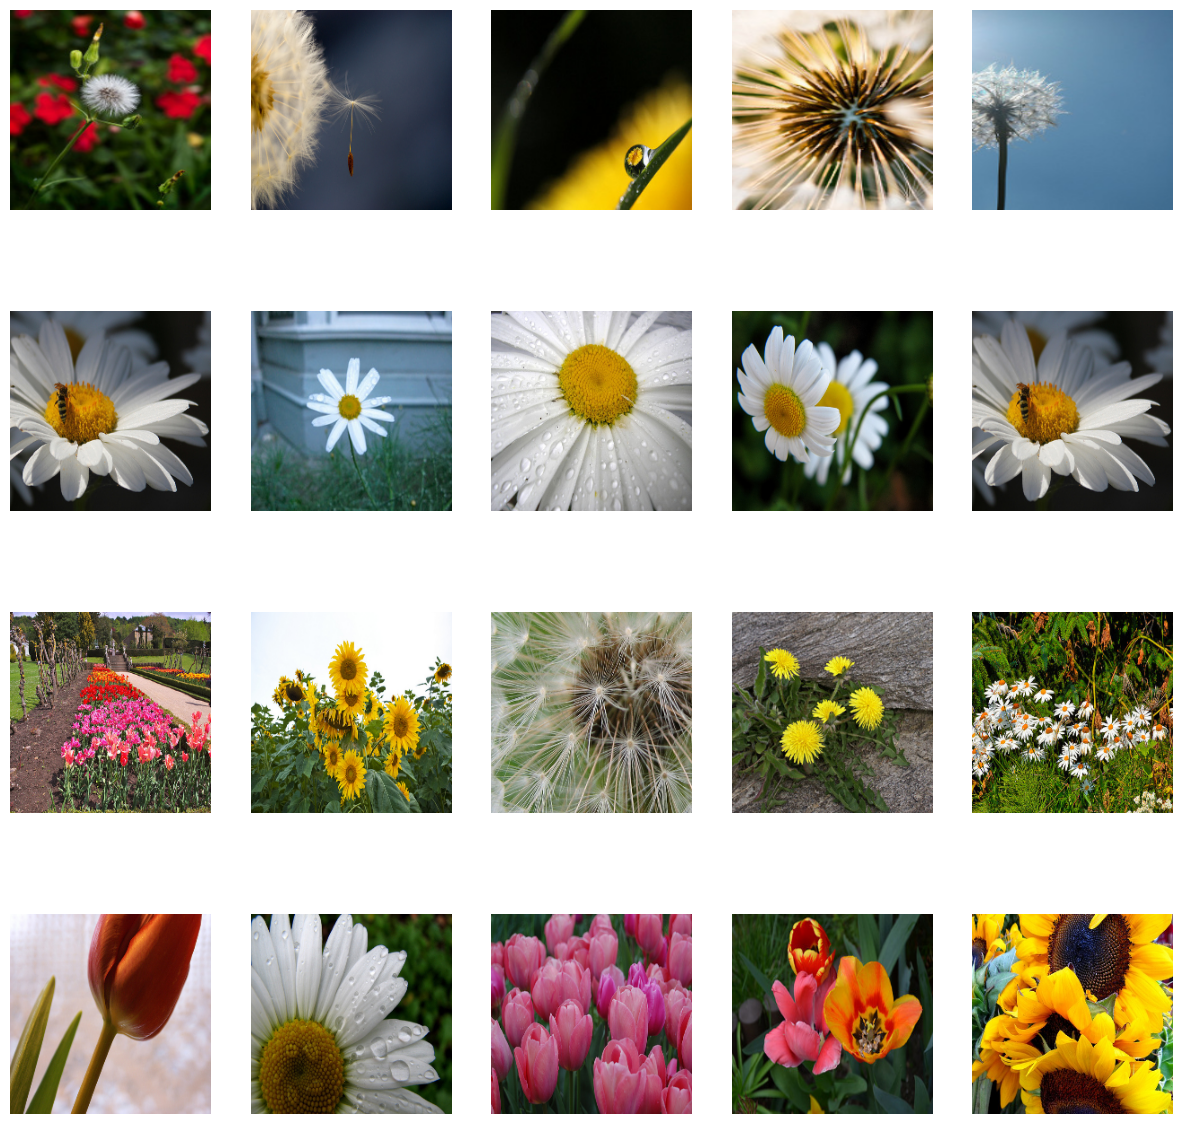

In [122]:
plotClusters(k_vgg16_pred_pca)